In [9]:
!pip install gensim
!pip install pot


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [11]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [12]:
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)

In [13]:
model.wv

In [14]:
import gensim.downloader

models = gensim.downloader.info()['models']

#### Similarity

In [15]:
model.wv.most_similar('trees', topn=10)

[('survey', 0.1991206258535385),
 ('human', 0.17272792756557465),
 ('minors', 0.17018885910511017),
 ('time', 0.145950585603714),
 ('eps', 0.06408977508544922),
 ('response', -0.002765784738585353),
 ('user', -0.013535077683627605),
 ('graph', -0.023671654984354973),
 ('computer', -0.032843153923749924),
 ('system', -0.05234673619270325)]

In [16]:
model.wv.similarity('trees', 'graph')

-0.023671657

In [17]:
model.wv.doesnt_match(['minors', 'human', 'interface'])

'minors'

### Distance

In [18]:
model.wv.distance('trees', 'graph')

1.0236716568470001

In [19]:
model.wv.wmdistance(['trees'], ['graph'])

1.4308540422347924

## Exercises

### Task 0. Train your word2vec model on an multi-document (for example) NLTK corpus.

don’t forget to preprocess tokens first (lemmatization etc.)

In [ ]:
import nltk
from nltk.corpus import reuters
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from nltk.corpus import stopwords

# Функція для попередньої обробки документів
def preprocess_documents(documents):
    lemmatizer = WordNetLemmatizer()  
    stop_words = set(stopwords.words('english'))  # Завантаження стоп-слів
    processed_docs = []  # Список для збереження оброблених документів
    for doc in documents:
        # Токенізація тексту та перетворення в нижній регістр
        tokens = nltk.word_tokenize(doc.lower())
        # Лематизація та видалення неалфавітних токенів
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
        # Видалення стоп-слів
        tokens = [token for token in tokens if token not in stop_words]
        processed_docs.append(tokens)  # Додавання обробленого документа до списку
    return processed_docs

# Завантаження та попередня обробка корпусу Reuters
documents = [reuters.raw(fileid) for fileid in reuters.fileids()] # Завантаження сирих текстів з корпусу Reuters
processed_documents = preprocess_documents(documents)  

# Навчання моделі Word2Vec на оброблених документах
nltk_model = Word2Vec(
    sentences=processed_documents, 
    vector_size=100,  
    window=5,  
    min_count=2,  
    workers=4  
)

### Task 1. Practice using similarity/distance.

##### Similarity

In [21]:
# Calculate similarity between two words
word1 = "market"
word2 = "trade"
similarity = nltk_model.wv.similarity(word1, word2)
print(f"Similarity between '{word1}' and '{word2}': {similarity}")

Similarity between 'market' and 'trade': 0.3441082537174225


In [22]:
# Find most similar words to a given word
word = "market"
most_similar_words = nltk_model.wv.most_similar(word, topn=5)
print(f"Most similar words to '{word}':")
for similar_word, score in most_similar_words:
    print(f"  {similar_word}: {score}")

Most similar words to 'market':
  plunging: 0.7479289174079895
  speculative: 0.7097756266593933
  diametrically: 0.6631187796592712
  chasing: 0.6614884734153748
  lot: 0.6513510346412659


##### Distance

In [23]:
# Calculate distance between two words
word1 = "market"
word2 = "finance"
distance = 1 - nltk_model.wv.similarity(word1, word2)
print(f"Distance between '{word1}' and '{word2}': {distance}")

Distance between 'market' and 'finance': 0.7297829389572144


In [36]:
# Find the word that doesn't match
words = ["market", "trade", "economy", "money", "fruit"]
odd_one_out = nltk_model.wv.doesnt_match(words)
print(f"The word that doesn't match: {odd_one_out}")

The word that doesn't match: fruit


##### Visualize

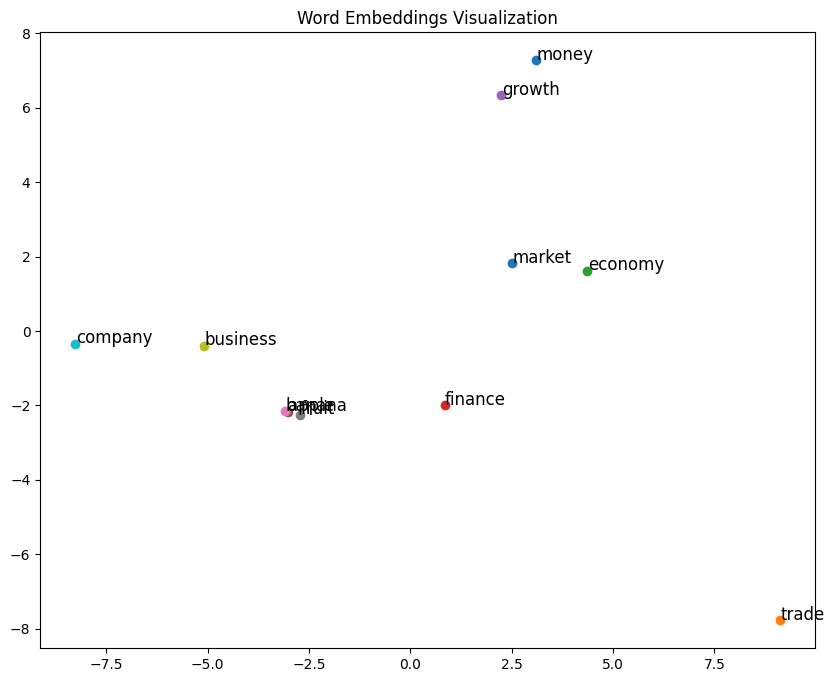

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select a subset of words to visualize
words = ["market", "trade", "economy", "finance", "growth", "apple", "banana", "fruit", "business", "company", "money"]
word_vectors = [nltk_model.wv[word] for word in words]

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Plot the words in 2D space
plt.figure(figsize=(10, 8))
for word, vector in zip(words, reduced_vectors):
    plt.scatter(vector[0], vector[1])
    plt.text(vector[0] + 0.01, vector[1] + 0.01, word, fontsize=12)
plt.title("Word Embeddings Visualization")
plt.show()

##### Check Similarity for a Sentence

In [26]:
import numpy as np

# Function to calculate sentence similarity
def sentence_similarity(sentence1, sentence2, model):
    def get_sentence_vector(sentence):
        tokens = [word for word in nltk.word_tokenize(sentence.lower()) if word in model.wv]
        if not tokens:
            return np.zeros(model.vector_size)
        return np.mean([model.wv[token] for token in tokens], axis=0)
    
    vector1 = get_sentence_vector(sentence1)
    vector2 = get_sentence_vector(sentence2)
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

# Example sentences
sentence1 = "The market is growing rapidly."
sentence2 = "The economy is expanding quickly."
similarity = sentence_similarity(sentence1, sentence2, nltk_model)
print(f"Similarity between sentences: {similarity}")

Similarity between sentences: 0.7919942140579224


#### Task 2. Visualize document distances on a plot.

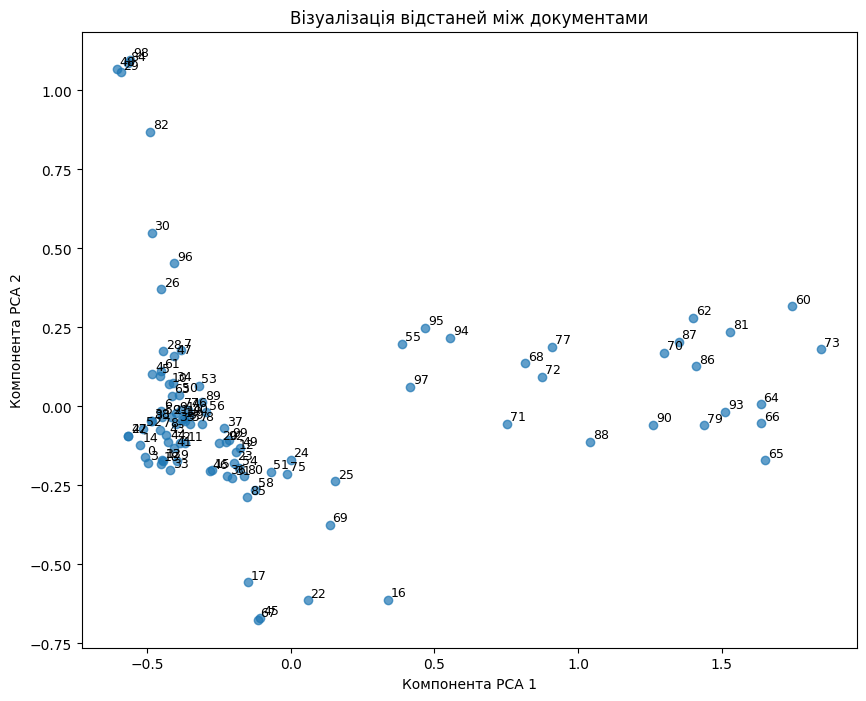

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Перетворення оброблених документів у TF-IDF вектори
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([' '.join(doc) for doc in processed_documents[:100]])  # Обмеження до 100 документів для візуалізації

# Обчислення матриці косинусної схожості
similarity_matrix = cosine_similarity(tfidf_matrix)

# Зменшення розмірності за допомогою PCA
pca = PCA(n_components=2)
reduced_similarity = pca.fit_transform(similarity_matrix)

# Побудова графіку документів у 2D-просторі
plt.figure(figsize=(10, 8))
plt.scatter(reduced_similarity[:, 0], reduced_similarity[:, 1], alpha=0.7)
for i, doc in enumerate(reduced_similarity):
    plt.text(doc[0] + 0.01, doc[1] + 0.01, str(i), fontsize=9)  # Додавання індексів документів
plt.title("Візуалізація відстаней між документами")
plt.xlabel("Компонента PCA 1")
plt.ylabel("Компонента PCA 2")
plt.show()


### Task 3. Compare your own trained word2vec with pretrained Glove vectors, using KeyedVectors.evaluate_word_pairs.

In [40]:
# Define the path to the word pairs file
word_pairs_path = 'wordsim353_agreed.txt'

# Load pretrained GloVe vectors
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-300')

# Evaluate your trained Word2Vec model
nltk_model_score = nltk_model.wv.evaluate_word_pairs(word_pairs_path)
print(f"Evaluation results for trained Word2Vec model: {nltk_model_score}")

# Evaluate pretrained GloVe vectors
glove_score = glove_vectors.evaluate_word_pairs(word_pairs_path)
print(f"Evaluation results for pretrained GloVe vectors: {glove_score}")

[==========----------------------------------------] 20.5% 77.1/376.1MB downloaded

KeyboardInterrupt: 